# First Order Traditional Fuzzy Time Series method by Song & Chissom (1993)

Q. Song and B. S. Chissom, “Fuzzy time series and its models,” Fuzzy Sets Syst., vol. 54, no. 3, pp. 269–277, 1993.

# Common Imports

In [1]:
import matplotlib.pylab as plt
from pyFTS.benchmarks import benchmarks as bchmk
from pyFTS.models import song

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Data Loading

In [2]:
from pyFTS.data import Enrollments

enrollments = Enrollments.get_data()

# Exploring the partitioning effects on original data

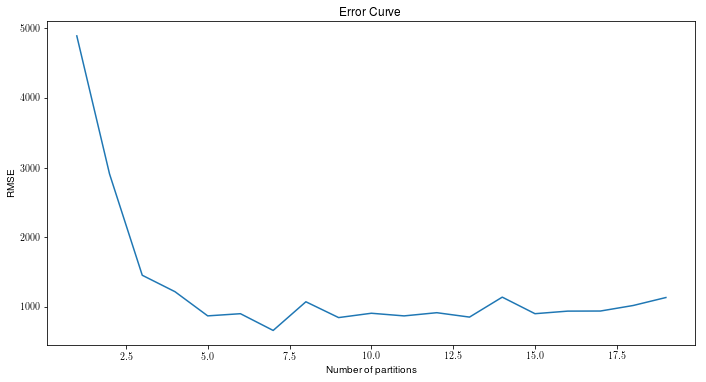

In [3]:
tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, song.ConventionalFTS, range(1,20), [1], tam=[10, 5])

# Exploring the partitioning effects on transformed data

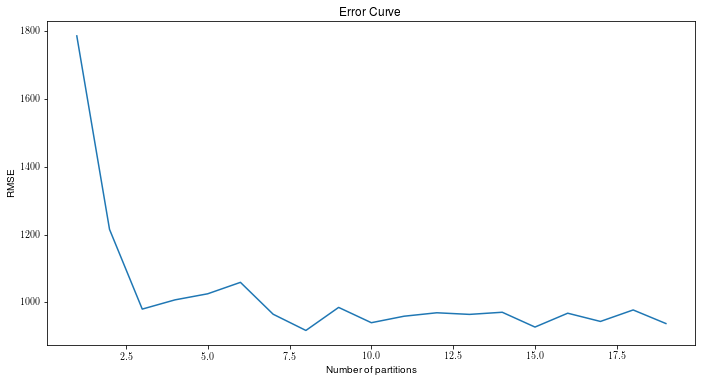

In [4]:
from pyFTS.common import Transformations
diff = Transformations.Differential(1)

tmp = bchmk.simpleSearch_RMSE(enrollments, enrollments, song.ConventionalFTS, 
                              range(1,20), [1], transformation=diff, tam=[10, 5])

# Comparing the partitioning schemas

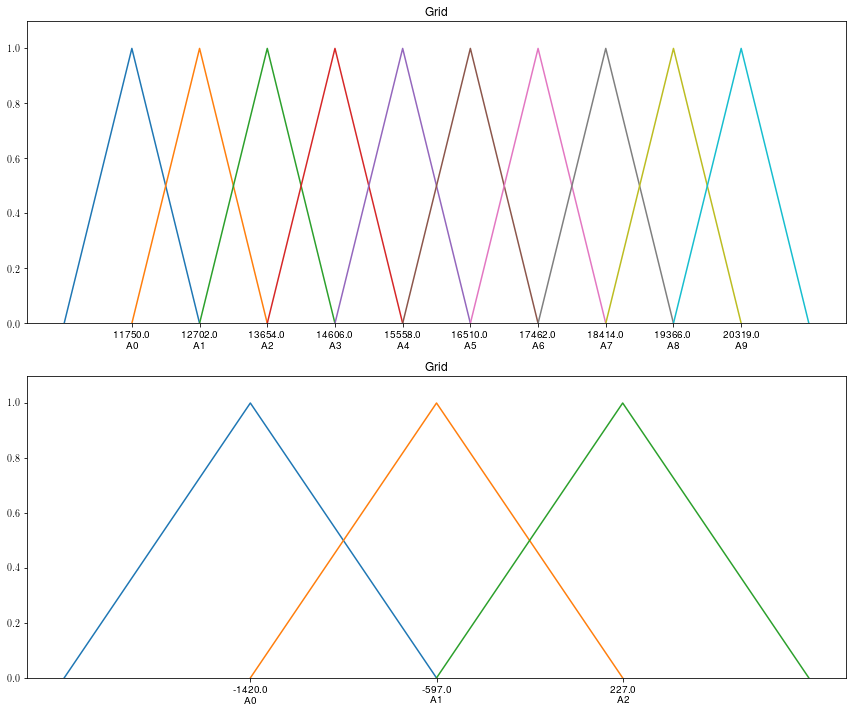

In [5]:
from pyFTS.partitioners import Grid, Util as pUtil

fuzzy_sets = Grid.GridPartitioner(enrollments, 10)
fuzzy_sets2 = Grid.GridPartitioner(enrollments, 3, transformation=diff)

pUtil.plot_partitioners(enrollments, [fuzzy_sets,fuzzy_sets2])

# Fitting a model on original data

In [6]:
model1 = song.ConventionalFTS("FTS", partitioner=fuzzy_sets)
model1.fit(enrollments)

print(model1)

Traditional FTS:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.91046234e-15
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  3.82092468e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.91046234e-15 1.91046234e-15
  1.00000000e+00 3.82092468e-15 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 3.82092468e-15 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 3.82092468e-15 1.00000000e+00
  3.82092468e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000000

# Fitting a model on transformed data

In [7]:
model2 = song.ConventionalFTS("FTS Diff", partitioner=fuzzy_sets2)
model2.append_transformation(diff)
model2.fit(enrollments)

print(model2)

Traditional FTS:
[[0.        1.        0.       ]
 [1.        1.        0.9999996]
 [0.        0.9999996 0.9999996]]


# Using the models

In [8]:
model1.predict(enrollments)

[13177.68,
 13177.68,
 13177.68,
 13653.740000000002,
 15557.980000000003,
 15557.980000000003,
 15557.980000000003,
 15557.980000000003,
 16034.040000000005,
 16034.040000000005,
 16034.040000000005,
 15557.980000000003,
 15557.980000000003,
 15557.980000000003,
 15557.980000000003,
 15557.980000000003,
 16034.040000000005,
 17938.280000000006,
 18890.400000000005,
 18890.400000000005,
 18890.400000000005,
 17938.280000000006]

In [9]:
model2.predict(enrollments)

[12870.2,
 12966.433333333332,
 13270.433333333332,
 14099.433333333332,
 14863.433333333332,
 15126.2,
 15006.433333333332,
 15264.433333333332,
 16210.433333333332,
 16734.2,
 16203.2,
 15248.2,
 15312.2,
 14960.2,
 14978.2,
 15387.433333333332,
 16262.433333333332,
 17553.433333333334,
 18373.433333333334,
 18731.433333333334,
 19152.2,
 18691.2]

# Comparing the models

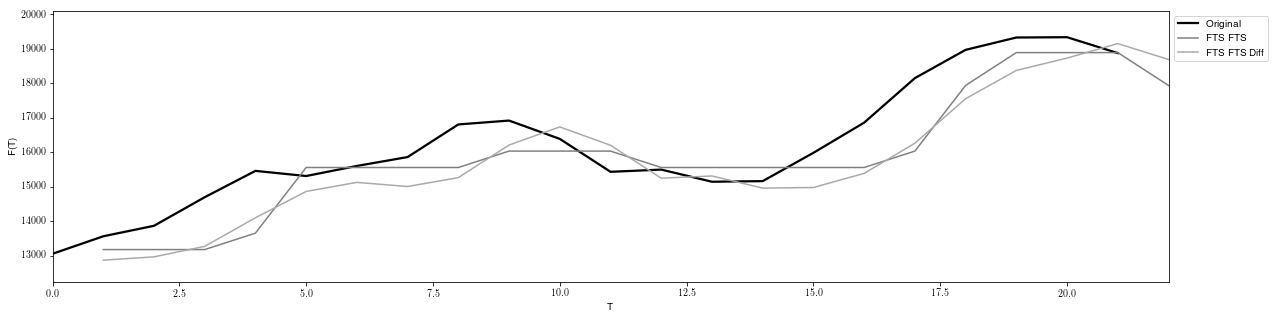

In [10]:
bchmk.plot_compared_series(enrollments, [model1, model2], bchmk.colors, intervals=False)

In [11]:
bchmk.print_point_statistics(enrollments, [model1, model2])

Model		& Order     & RMSE		& SMAPE      & Theil's U		\\ 
FTS FTS		& 1		& 907.99		& 2.22		& 1.48	\\ 
FTS FTS Diff		& 1		& 979.77		& 2.67		& 1.6	\\ 



# Residual Analysis

In [12]:
from pyFTS.benchmarks import ResidualAnalysis as ra

ra.plot_residuals(enrollments, [model1, model2])

ValueError: cannot convert float NaN to integer